In [1]:
import sys
sys.path.append('/Users/gscerberus/Desktop/Loan_Prediction_Analysis')

In [2]:
import os
os.chdir('/Users/gscerberus/Desktop/Loan_Prediction_Analysis')

In [3]:
os.getcwd()

'/Users/gscerberus/Desktop/Loan_Prediction_Analysis'

In [4]:
import pandas as pd
from src.preprocessing import (drop_column,
                                convert_float_to_object,
                                add_total_income,
                                fill_nan_values,
                                remove_outliers,
                                scale_features,
                               encode_features)
from src.visualizations import (draw_facetgrid,
                                draw_countplots,
                                draw_distplots,
                                box_dist_plots)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/loan_data_set.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.shape

(614, 13)

In [8]:
df.isna().sum() #Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Remove Loan_ID column
df = drop_column(df, col_name = ["Loan_ID"])

If we see closely the column "Dependents" have got not clear values when indicating 3+. Because we are not getting necessary information, it is better if we drop also this column.

In [10]:
df = drop_column(df, col_name = ["Dependents"])

In [11]:
# Replace type of data of Credit History
df['Credit_History'] = convert_float_to_object(df, 'Credit_History')

In [12]:
df['Credit_History'].dtype

dtype('O')

In [13]:
# Fill missing values
df = fill_nan_values(df, cols=["Gender", "Married", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"])

In [14]:
df.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

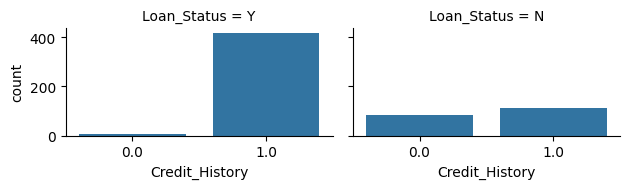

In [16]:
# drawing visualizations and getting conclusions
draw_facetgrid(data = df, col = "Loan_Status" , map = "Credit_History")

We can observe that, people with credit history as 1, have more chances to get their loans approved.

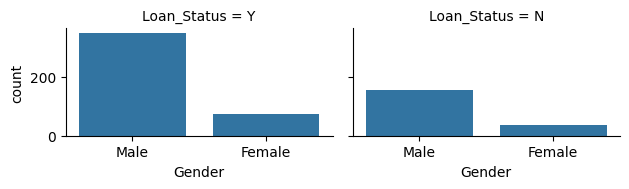

In [17]:
draw_facetgrid(data = df, col = "Loan_Status" , map = "Gender")

Males have got a higher chances, of getting their loan approved.

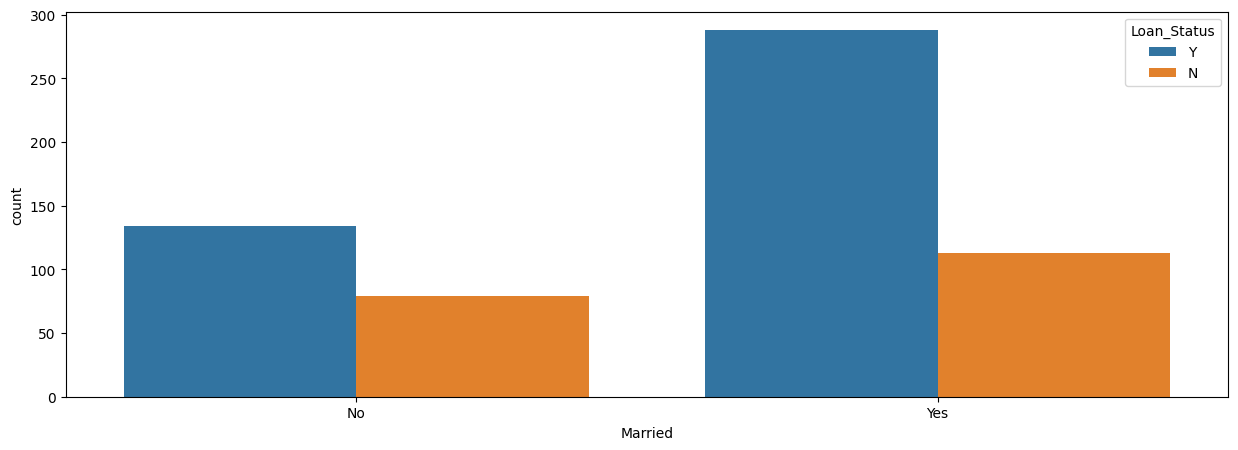

In [18]:
draw_countplots(data = df, col = "Married", hue = "Loan_Status")

If you are married, you have higher chances of getting the loan.

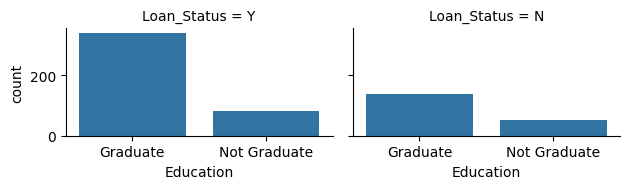

In [19]:
draw_facetgrid(data = df, col="Loan_Status", map = "Education")

Chances are that if you are educated, you will most likely get your loan approved, but there is not such a huge difference, with the uneducated people as well.

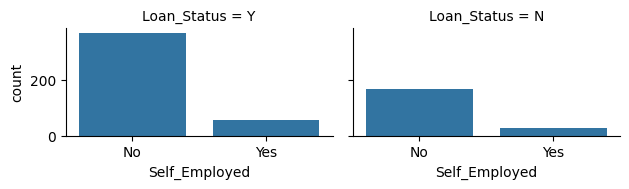

In [20]:
draw_facetgrid(data = df, col="Loan_Status", map = "Self_Employed")

Not a significant pattern

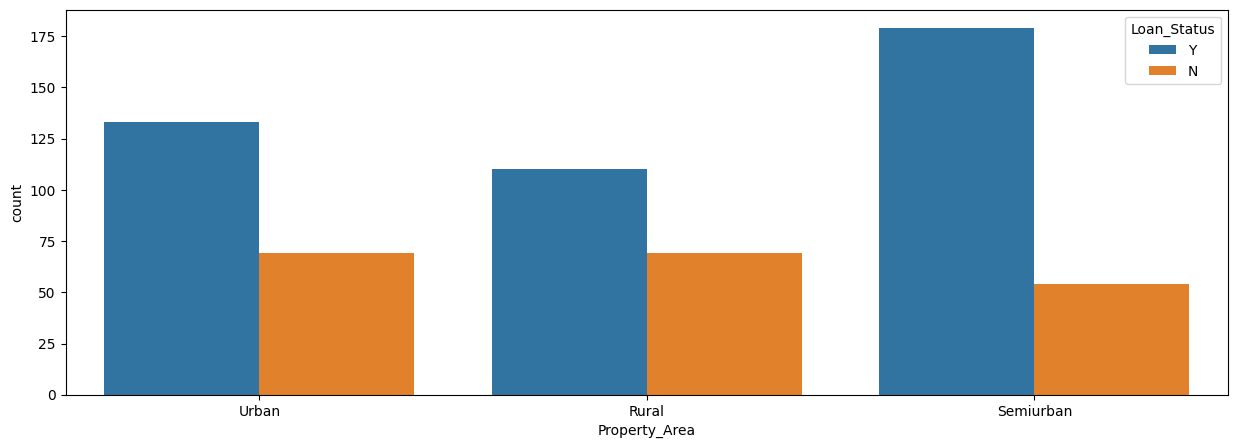

In [21]:
draw_countplots(data = df, col = "Property_Area", hue = "Loan_Status")

Based on the observations, we can see, that semiurban areas are the most favored areas to approve the loan.

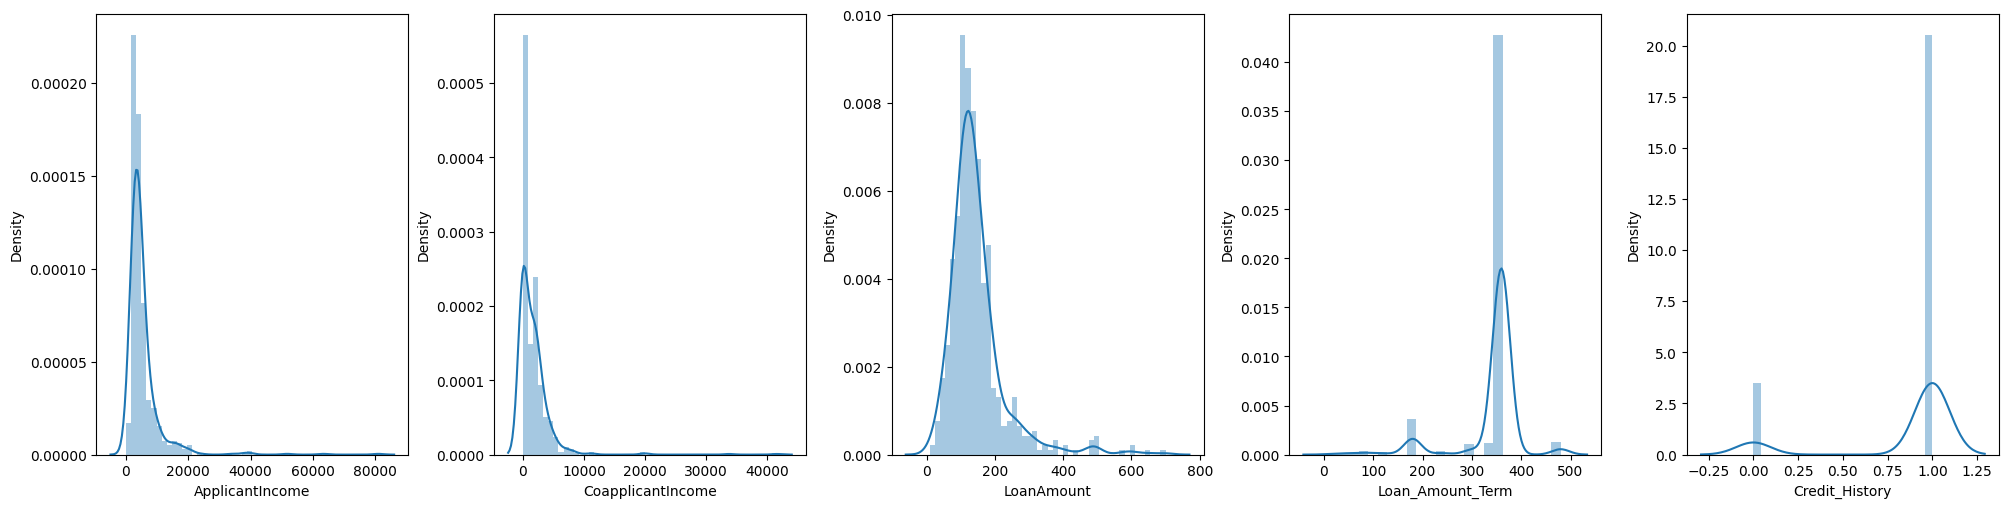

In [22]:
draw_distplots(df)

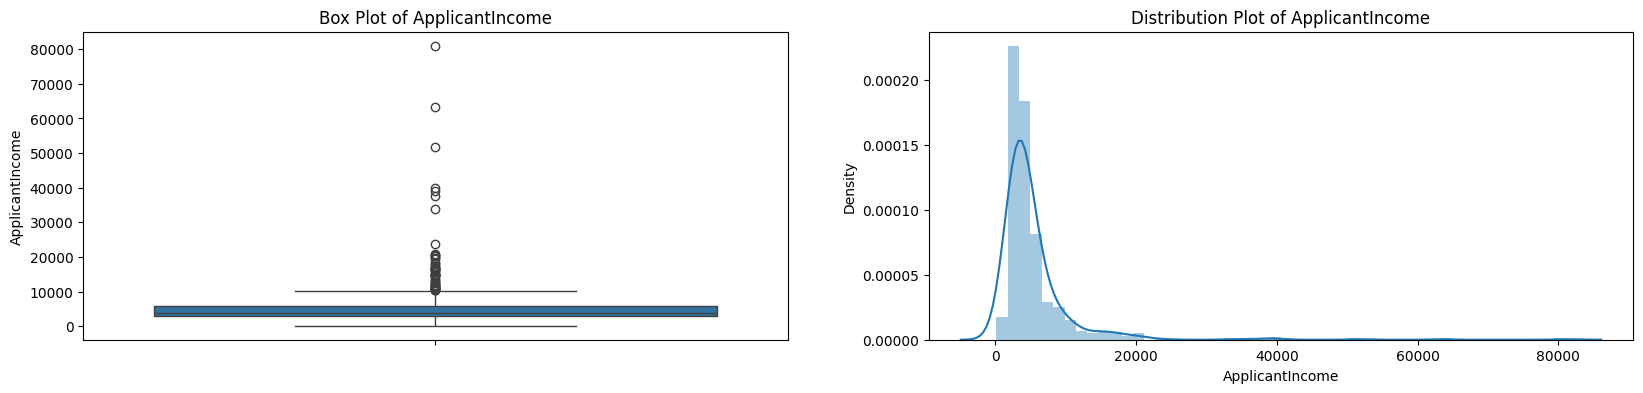

In [23]:
box_dist_plots(data = df, col_name="ApplicantIncome")

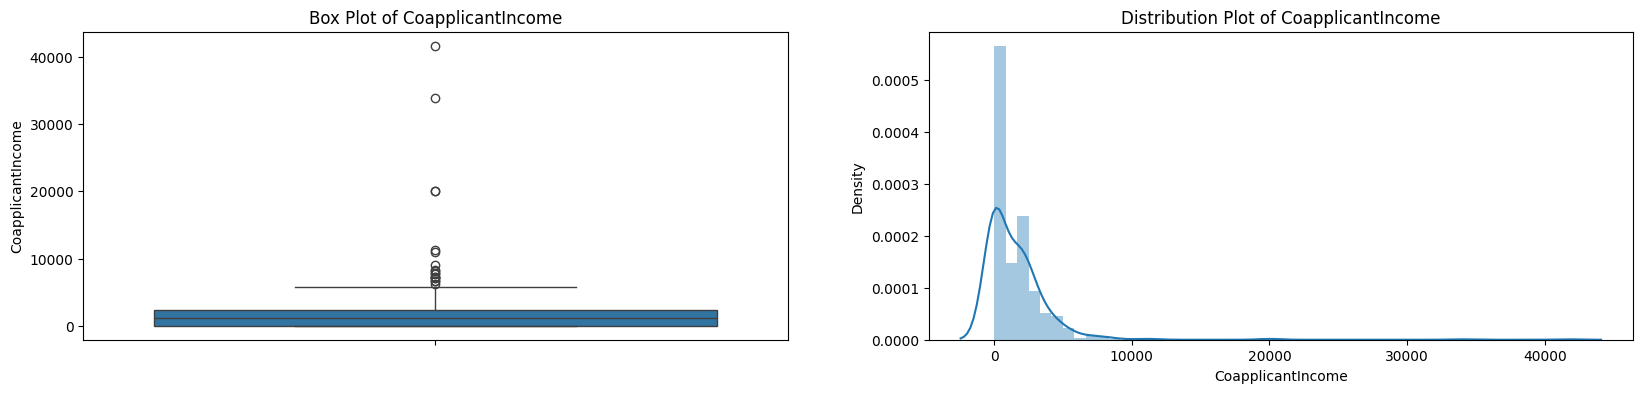

In [24]:
box_dist_plots(data = df, col_name="CoapplicantIncome")

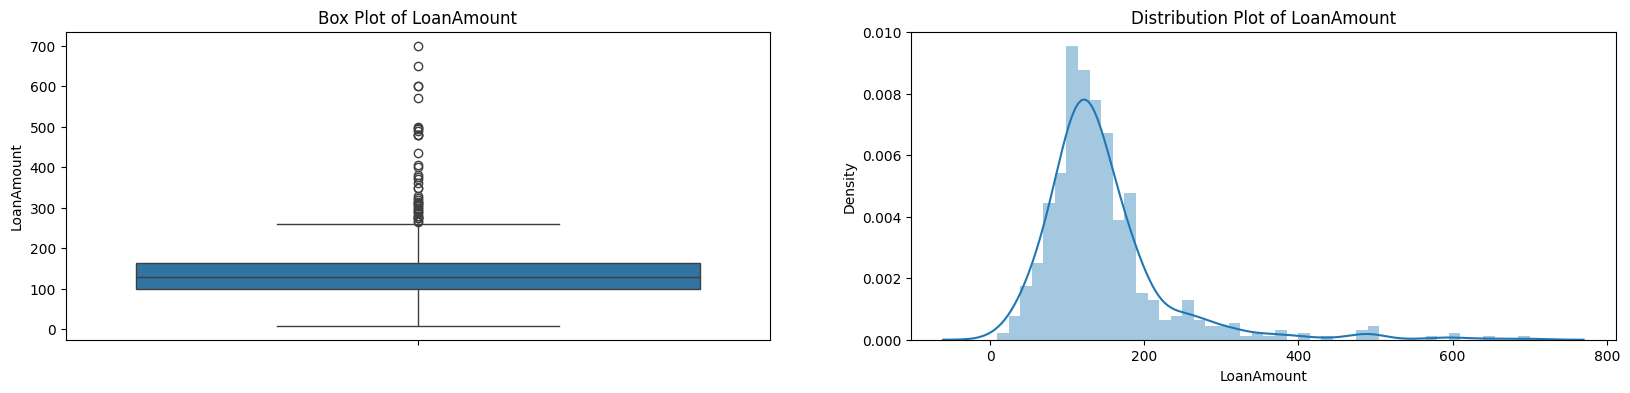

In [25]:
box_dist_plots(data = df, col_name="LoanAmount")

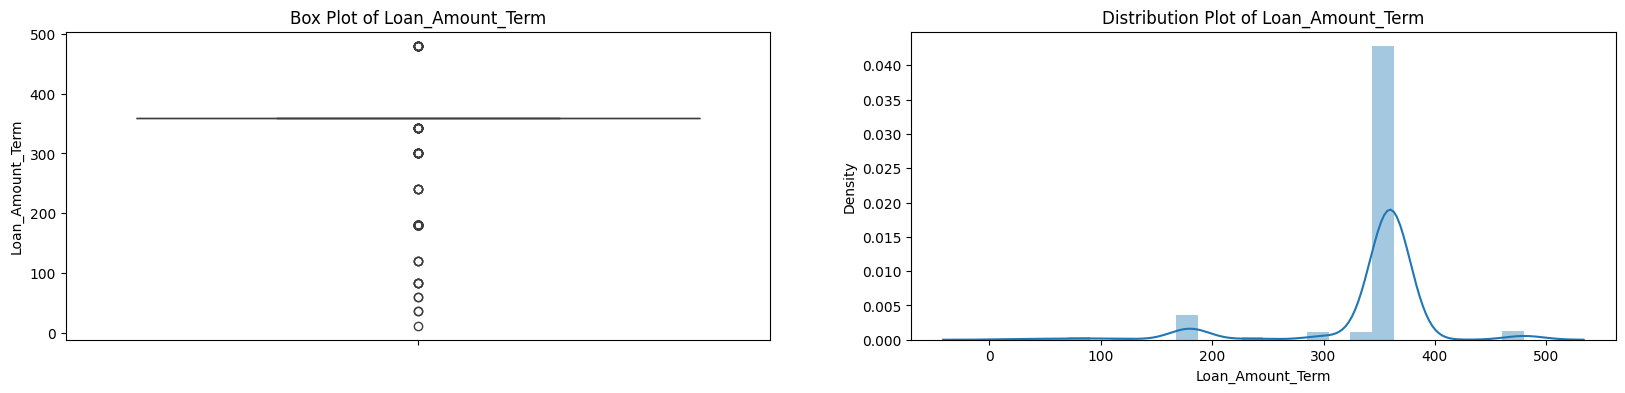

In [26]:
box_dist_plots(data=df, col_name="Loan_Amount_Term")

In [27]:
df_without_apinc_outliers = remove_outliers(df, "ApplicantIncome")
df_without_coapinc_outliers = remove_outliers(df_without_apinc_outliers, "CoapplicantIncome")
df_without_la_outliers = remove_outliers(df_without_coapinc_outliers, "LoanAmount")
df_no_outliers = remove_outliers(df_without_la_outliers, "Loan_Amount_Term")

In [28]:
df_no_outliers.shape

(534, 11)

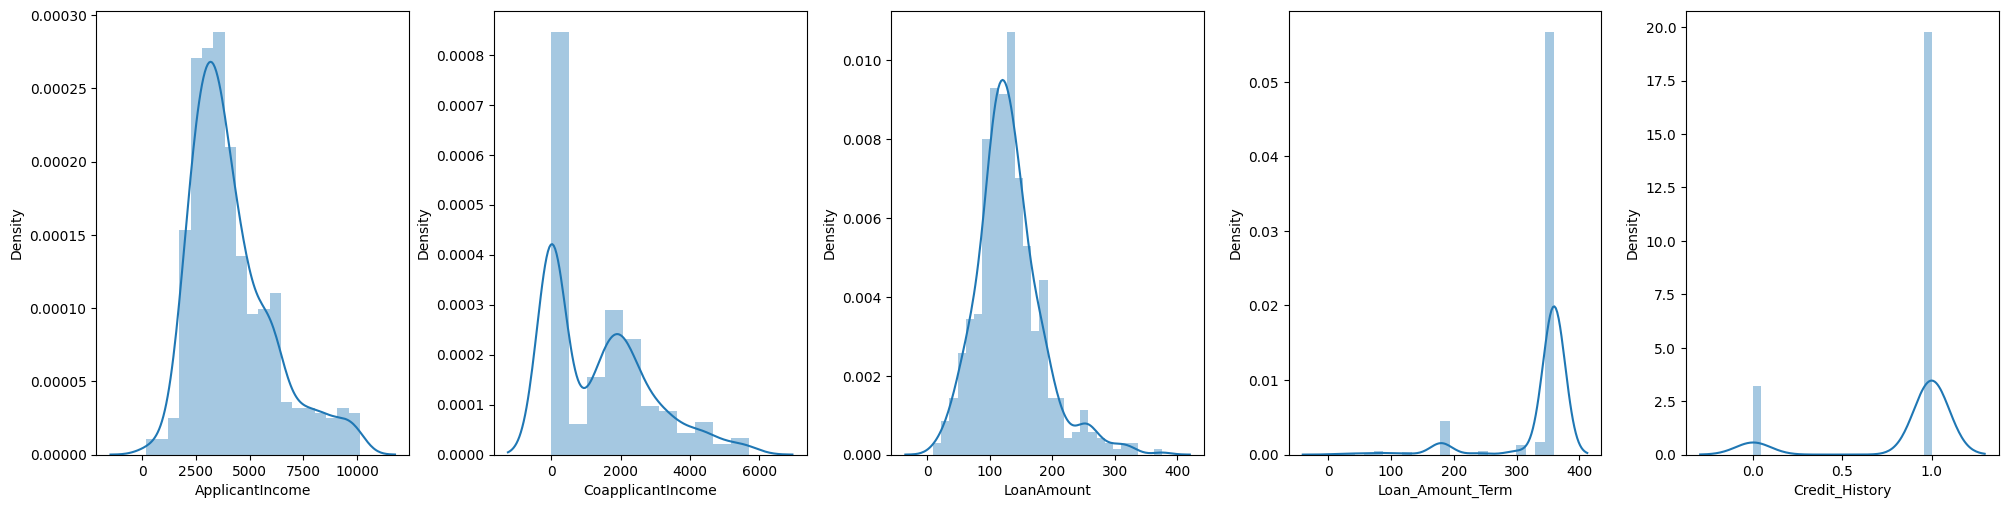

In [29]:
draw_distplots(df_no_outliers)

## Adding new columns

In [30]:
# Adding total income
updated_df = add_total_income(df_no_outliers, "ApplicantIncome", "CoapplicantIncome", "TotalIncome")

In [31]:
# Dropping ApplicantIncome and CoapplicantIncome
updated_df = drop_column(updated_df, col_name=['ApplicantIncome','CoapplicantIncome'])

In [32]:
# Round all float columns to 2 decimal places
float_columns = updated_df.select_dtypes(include=['float'])
updated_df[float_columns.columns] = float_columns.round(2)

In [33]:
updated_df.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,Graduate,No,146.41,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,Graduate,No,128.00,360.0,1.0,Rural,N,6091.0
2,Male,Yes,Graduate,Yes,66.00,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,Not Graduate,No,120.00,360.0,1.0,Urban,Y,4941.0
4,Male,No,Graduate,No,141.00,360.0,1.0,Urban,Y,6000.0


In [35]:
# saving the df_no_outliers in csv to make changes to the pickle file later
updated_df.to_csv('data/pre_final_data_set.csv', index=False)

In [36]:
# ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

cols_to_be_scaled = ["TotalIncome", "LoanAmount", "Loan_Amount_Term"]

updated_df = scale_features(updated_df, cols_to_be_scaled)

In [37]:
updated_df.info() # Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            534 non-null    object 
 1   Married           534 non-null    object 
 2   Education         534 non-null    object 
 3   Self_Employed     534 non-null    object 
 4   LoanAmount        534 non-null    float64
 5   Loan_Amount_Term  534 non-null    float64
 6   Credit_History    534 non-null    float64
 7   Property_Area     534 non-null    object 
 8   Loan_Status       534 non-null    object 
 9   TotalIncome       534 non-null    float64
dtypes: float64(4), object(6)
memory usage: 45.9+ KB


In [38]:
cols_to_be_encoded = updated_df.columns[updated_df.dtypes == 'object']

updated_df = encode_features(updated_df, cols_to_be_encoded)

In [39]:
cols_to_be_encoded

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [40]:
updated_df = updated_df.astype(float)

In [41]:
# Now we are ready for predictions

updated_df.to_csv('data/final_loan_data_set.csv', index=False)

In [42]:
updated_df.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0.0,0.0,0.37,1.0,1.0,2.0,1.0,0.36
1,1.0,1.0,0.0,0.0,0.32,1.0,1.0,0.0,0.0,0.38
2,1.0,1.0,0.0,1.0,0.16,1.0,1.0,2.0,1.0,0.13
3,1.0,1.0,1.0,0.0,0.30,1.0,1.0,2.0,1.0,0.28
4,1.0,0.0,0.0,0.0,0.36,1.0,1.0,2.0,1.0,0.37
